# EDA on Global Terrorism
## By Rahul Inchal

### Project Description
The Global Terrorism dataset (GTD) is an open source database including information on terrorist attacks around the world from 1970 through 2017. the GTD includes systematic data on domestic as well as international terrorist incidents that have occured during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the study of Terrorism and responses to terrorism (START), headquartered at the university of Maryland.

### GitHub link
https://github.com/rahulinchal/EDA-on-Global-Terrorism

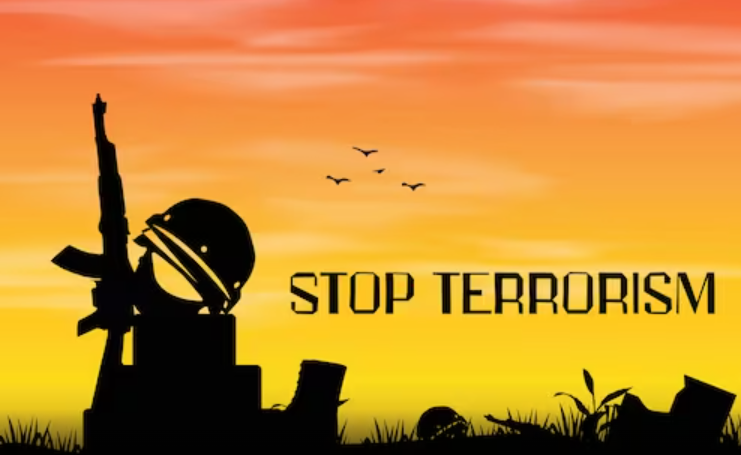

### Imporitng Important Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
data = pd.read_csv("C:/Users\Rahul\Desktop\Data_Science\AlmaBetter\Global Terrorism/Global_Terrorism_Data.csv", 
                   encoding=('ISO-8859-1'), low_memory = False)

# getting all the data column
pd.set_option('display.max_columns', None)

data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [3]:
# Getting the shape of the dataset
data.shape

(181691, 135)

In [4]:
# CHecking for null values

data.isnull().sum().sort_values(ascending = False)

gsubname3           181671
weapsubtype4_txt    181621
weapsubtype4        181621
weaptype4           181618
weaptype4_txt       181618
                     ...  
suicide                  0
success                  0
crit3                    0
property                 0
eventid                  0
Length: 135, dtype: int64

### Since there are a lot of columns with a lot of null values, instead of removing the null values from the different columns, we can simply get the columns we want.

### First we will rename the columns

In [5]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                     'provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType',
                     'target1':'Target','nkill':'Killed','nwound':'Wounded',
                     'gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type'},inplace=True)

### Now extracting the columns which we want and storing it into df

In [6]:
df = data[['Year','Month','Day','Country','state','Region','city','latitude','longitude',
           'AttackType','Killed','Wounded','Target','Group','Target_type','Weapon_type']]
df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


### Data Description

**Year** - This field contains the year in which the incident occurred. In the case of incident(s) occurring
over an extended period, the field will record the year when the incident was initiated. 

**Month** - This field contains the number of the month in which the incident occurred. In the case of
incident(s) occurring over an extended period, the field will record the month when the
incident was initiated.
For attacks that took place between 1970 and 2011, if the exact month of the event is
unknown, this is recorded as “0.” For attacks that took place after 2011, if the exact month of
the event is unknown, this is recorded as the midpoint of the range of possible dates reported
in source materials and the full range is recorded in the Approximate Date (approxdate) field
below.

**Day** - This field contains the numeric day of the month on which the incident occurred. In the case of
incident(s) occurring over an extended period, the field will record the day when the incident
was initiated.
For attacks that took place between 1970 and 2011, if the exact day of the event is unknown,
this is recorded as “0.” For attacks that took place after 2011, if the exact day of the event is
unknown, this is recorded as the midpoint of the range of possible dates reported in source
materials and the full range is recorded in the Approximate Date (approxdate) field below.

**Country** - Country in which the attack happened.

**State** - State in which the attack happened.

**Region** - Region in which the attack happened.

**City** - City in which the attack happened.

**latitude and longitude** - This field records the latitude (based on WGS1984 standards) of the city in which the event
occurred. 
This field records the longitude (based on WGS1984 standards) of the city in which the event
occurred.

**AttackType** - This field captures the general method of attack and often reflects the broad class of tactics
used. It consists of nine categories, which are defined below. Up to three attack types can be
recorded for each incident. Typically, only one attack type is recorded for each incident unless
the attack is comprised of a sequence of events.
When multiple attack types may apply, the most appropriate value is determined based on the
hierarchy below. For example, if an assassination is carried out through the use of an explosive,
the Attack Type is coded as Assassination, not Bombing/Explosion. If an attack involves a
sequence of events, then the first, the second, and the third attack types are coded in the order
of the hierarchy below rather than the order in which they occurred.
Attack Type Hierarchy:
* Assassination
* Hijacking
* Kidnapping
* Barricade Incident
* Bombing/Explosion
* Armed Assault
* Unarmed Assault
* Facility/Infrastructure Attack
* Unknown

**Killed** - How many People were killed

**Wounded** - How many People were wounded

**Target** - This is the specific person, building, installation, etc., that was targeted and/or victimized and is
a part of the entity named above. (For example, if the U.S. Embassy in Country X was attacked
the “Name of Entity” would be “United States Department of State” and the “Specific
Target/Victim” would be “United States Embassy”). If names of victims are known, they are
listed here preceded by the specific type of target (e.g., civilians, soldiers, officers).

**Group** - The group they beong to

**Weapon_type** - Information on up to four types and sub-types of the weapons used in an attack are recorded
for each case, in addition to any information on specific weapon details reported.

In [7]:
# checking for shape
df.shape

(181691, 16)

### Checking for duplicated values

In [8]:
duplicates = df.duplicated().value_counts()
duplicates

False    171033
True      10658
dtype: int64

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

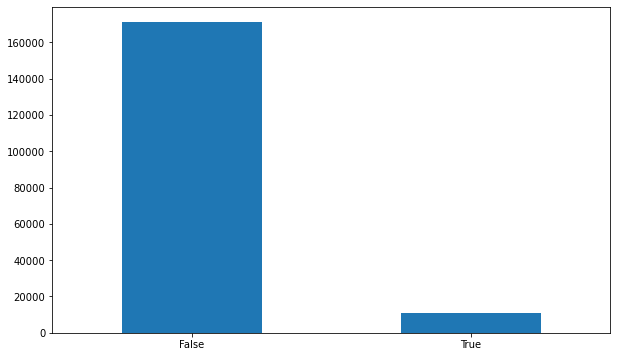

In [9]:
# Visualizing the duplicated values
plt.figure(figsize = (10,6))
duplicates.plot(kind = 'bar')
plt.xticks(rotation = 360)

### Dropping the duplicated values

In [10]:
df = df.drop_duplicates()
df.shape

(171033, 16)

### Checking for null values

In [11]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
state            421
Region             0
city             431
latitude        4007
longitude       4008
AttackType         0
Killed          9376
Wounded        15167
Target           544
Group              0
Target_type        0
Weapon_type        0
dtype: int64

Text(0.5, 1.0, 'Places of missing values in column')

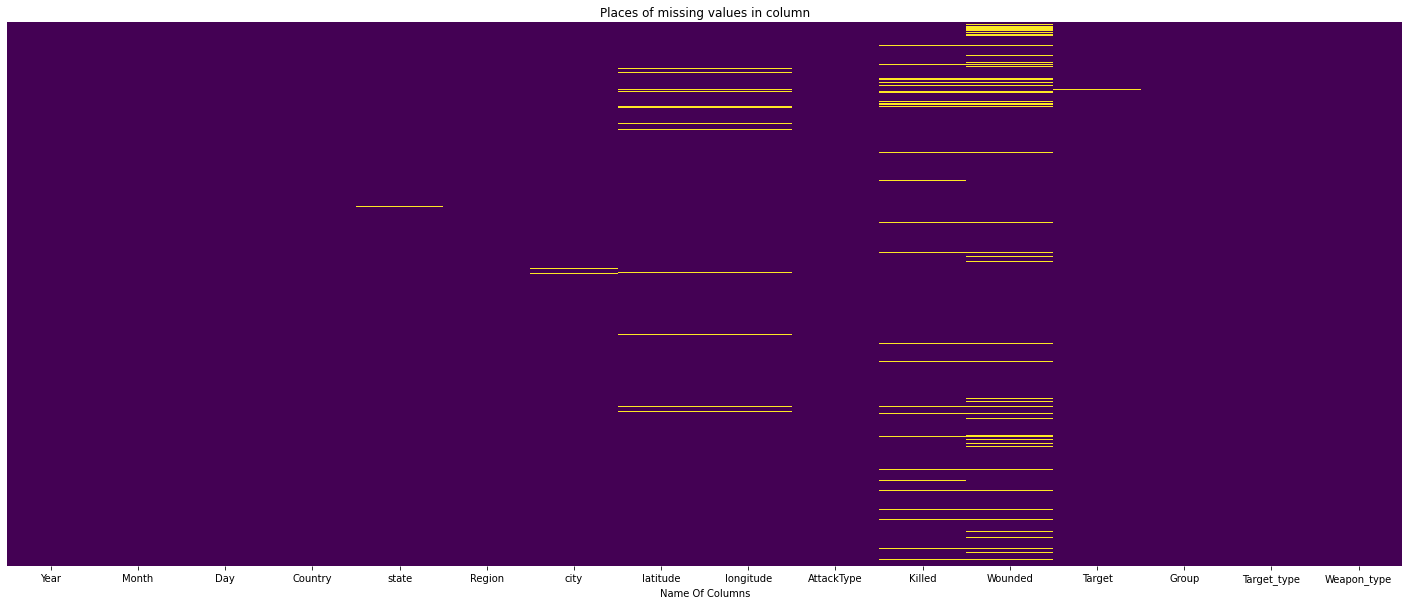

In [12]:
# Visulaizing null values through heatmap.
plt.figure(figsize=(25, 10))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False,cmap='viridis')
plt.xlabel("Name Of Columns")
plt.title("Places of missing values in column")

### Describing unique values in all individual column.


In [13]:
print(df.apply(lambda col: col.unique()))

Year           [1970, 1971, 1972, 1973, 1974, 1975, 1976, 197...
Month                 [7, 0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12]
Day            [2, 0, 1, 3, 6, 8, 9, 10, 11, 12, 13, 14, 15, ...
Country        [Dominican Republic, Mexico, Philippines, Gree...
state          [nan, Federal, Tarlac, Attica, Fukouka, Illino...
Region         [Central America & Caribbean, North America, S...
city           [Santo Domingo, Mexico city, Unknown, Athens, ...
latitude       [18.456792, 19.371887, 15.478598, 37.99749, 33...
longitude      [-69.951164, -99.086624, 120.599741, 23.762728...
AttackType     [Assassination, Hostage Taking (Kidnapping), B...
Killed         [1.0, 0.0, nan, 7.0, 47.0, 2.0, 36.0, 5.0, 3.0...
Wounded        [0.0, nan, 1.0, 2.0, 7.0, 9.0, 17.0, 5.0, 3.0,...
Target         [Julio Guzman, Nadine Chaval, daughter, Employ...
Group          [MANO-D, 23rd of September Communist League, U...
Target_type    [Private Citizens & Property, Government (Dipl...
Weapon_type    [Unknown, 

### Replacing the null values with respective others or 0.

In [14]:
# Replacing the nan values in state colums with others
df['state'].replace(np.nan, 'others', inplace = True)

# Replacing the nan values in city colums with others
df['city'].replace(np.nan, 'unknown', inplace = True)

# Replacing the nan values in latitude colums with 0
df['latitude'].replace(np.nan, 0, inplace = True)

# Replacing the nan values in longitude colums with 0
df['longitude'].replace(np.nan, 0, inplace = True)

# Replacing the nan values in Killed colums with 0
df['Killed'].replace(np.nan, 0, inplace = True)

# Replacing the nan Wounded in latitude colums with 0
df['Wounded'].replace(np.nan, 0, inplace = True)

# Replacing the nan values in Target colums with others
df['Target'].replace(np.nan, 'others', inplace = True)

In [15]:
df.isnull().sum()

Year           0
Month          0
Day            0
Country        0
state          0
Region         0
city           0
latitude       0
longitude      0
AttackType     0
Killed         0
Wounded        0
Target         0
Group          0
Target_type    0
Weapon_type    0
dtype: int64

### Describing the dataset

In [16]:
df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Year,171033.000000,2002.985921,13.203079,1970.000000,1991.000000,2009.000000,2014.000000,2017.000000
Month,171033.000000,6.470354,3.391493,0.000000,4.000000,6.000000,9.000000,12.000000
Day,171033.000000,15.521168,8.814147,0.000000,8.000000,15.000000,23.000000,31.000000
latitude,171033.000000,23.190181,18.465412,-53.154613,9.999291,31.248484,34.533753,74.633553
longitude,171033.000000,-475.223543,208399.371454,-86185896.000000,3.055413,43.143570,68.715498,179.366667
Killed,171033.000000,2.378535,11.542515,0.000000,0.000000,0.000000,2.000000,1570.000000
Wounded,171033.000000,3.029790,35.344750,0.000000,0.000000,0.000000,2.000000,8191.000000


### Correlation

<AxesSubplot:>

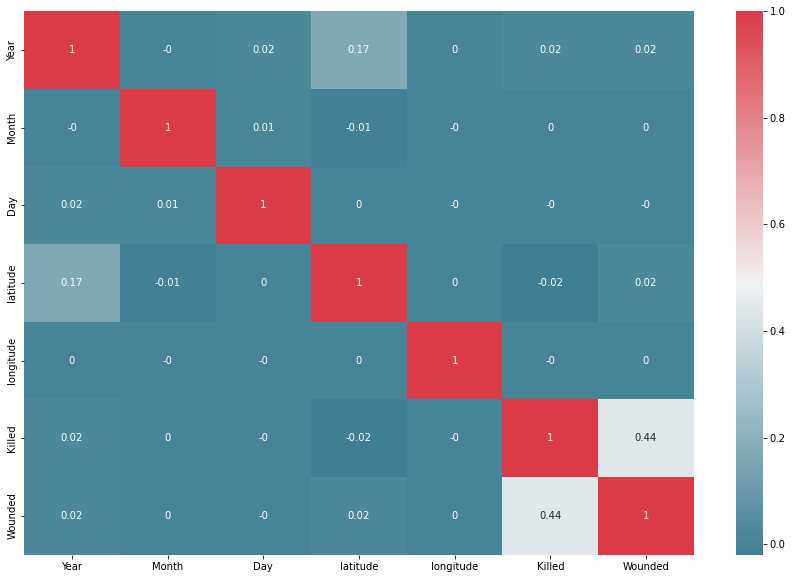

In [17]:
plt.figure(figsize=(15,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(np.round(df.corr(),2),annot=True, cmap=cmap)

## Univariate analysis

### Terrorist activity over the year

In [18]:
df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,others,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


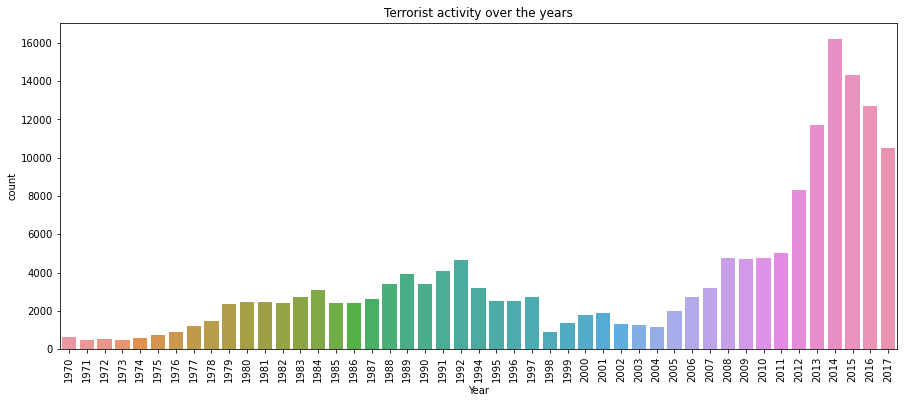

In [19]:
# Visulaizing the Terrorist activity using bar graph

plt.figure(figsize = (15,6))
sns.countplot(df['Year'])
plt.xticks(rotation = 90)
plt.title("Terrorist activity over the years")
plt.show();

### Observations
* As we can see, the terrorist activities are increasing with year on year

### Which country is most hit with terrorism

In [20]:
df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,others,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


In [21]:
# Getting top 15 countries with highest attacks

df['Country'].value_counts().iloc[:15]

Iraq              23112
Pakistan          13710
Afghanistan       12469
India             11533
Colombia           7492
Philippines        6764
Peru               5048
United Kingdom     4985
El Salvador        4305
Somalia            4087
Turkey             4064
Nigeria            3773
Thailand           3702
Yemen              3245
Spain              3071
Name: Country, dtype: int64

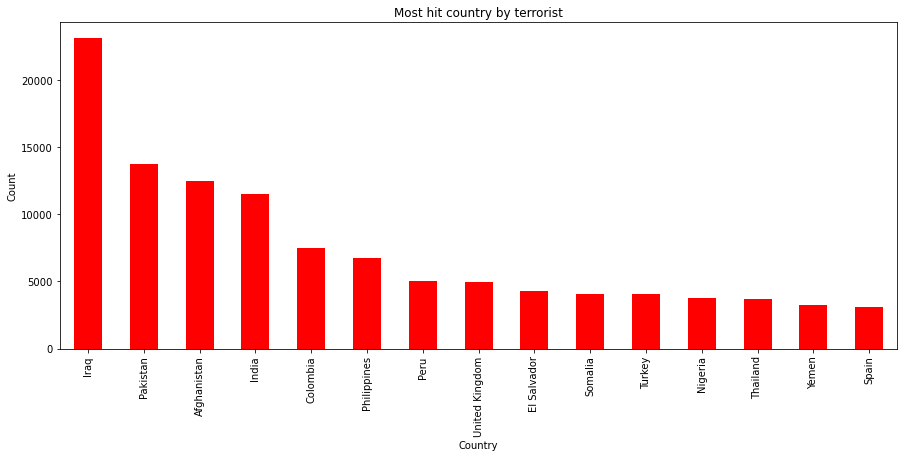

In [22]:
# Visualizing it using bar graph

plt.figure(figsize = (15,6))
df['Country'].value_counts().iloc[:15].plot(kind = 'bar', color = 'r')
plt.title("Most hit country by terrorist")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

### Observation 
* Iraq is the country which is most affected by terrorism followed by Pakisthan.

### Which state is most hit with terrorism

In [23]:
df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,others,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


In [24]:
# Top 15 states

df['state'].value_counts().iloc[:15]

Baghdad                                7487
Northern Ireland                       4287
Unknown                                3763
Balochistan                            3656
Saladin                                3116
Khyber Pakhtunkhwa                     3031
Nineveh                                2969
Diyala                                 2866
Al Anbar                               2822
Sindh                                  2700
Federally Administered Tribal Areas    2358
Jammu and Kashmir                      2343
Lima                                   1970
Punjab                                 1687
Banaadir                               1580
Name: state, dtype: int64

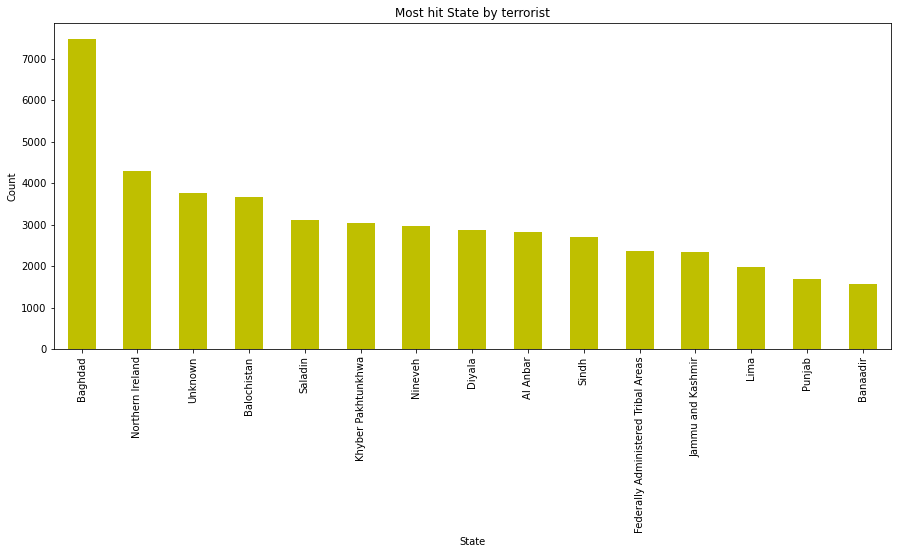

In [25]:
# Visualizing with bar graph

plt.figure(figsize = (15,6))
df['state'].value_counts().iloc[:15].plot(kind = 'bar', color = 'y')
plt.title("Most hit State by terrorist")
plt.xlabel("State")
plt.ylabel("Count")
plt.show()

### Observation 
* Baghdad is the state which is most affected by terrorism, followed by Northern island

### What is the contribution of attack type ?

In [26]:
df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,others,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


In [27]:
# Getting the unique values

df['AttackType'].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [28]:
# Getting the value counts

df['AttackType'].value_counts()

Bombing/Explosion                      81305
Armed Assault                          41243
Assassination                          18887
Hostage Taking (Kidnapping)            10953
Facility/Infrastructure Attack          9226
Unknown                                 6901
Hostage Taking (Barricade Incident)      938
Unarmed Assault                          930
Hijacking                                650
Name: AttackType, dtype: int64

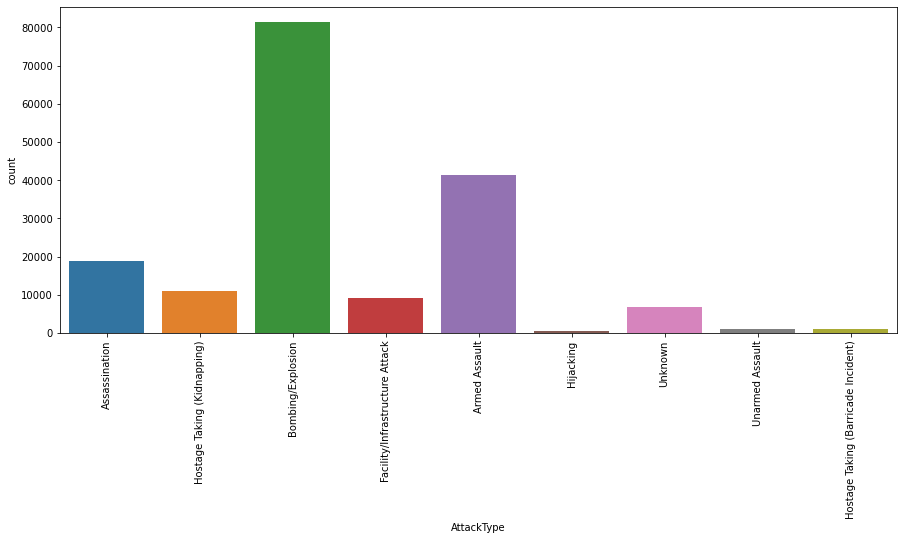

In [29]:
# Visualizing using Countplot

plt.figure(figsize = (15,6))
sns.countplot(df['AttackType'], data = df)
plt.xticks(rotation = 90);

### Observation
* Terrorist mostly prefere Bombing and Explosion followed by Armed assualt
* Hijacking is least preffered by them. Mostly because of the tight security airport officials have.

### How many people are Killed in terrorist activity ?

In [30]:
df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,others,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


In [31]:
# Filtering out top 15 values

top_15_killed = df['Killed'].value_counts().iloc[:15]
top_15_killed

0.0     89164
1.0     35823
2.0     13977
3.0      7630
4.0      4911
5.0      3507
6.0      2514
7.0      1934
8.0      1480
10.0     1161
9.0      1046
11.0      817
12.0      742
13.0      570
15.0      546
Name: Killed, dtype: int64

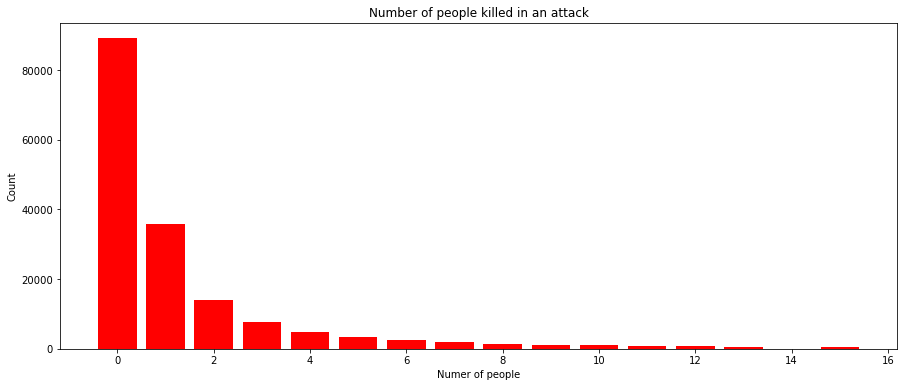

In [32]:
# Visualizing with bar graph

plt.figure(figsize = (15,6))
plt.bar(top_15_killed.keys(), top_15_killed, color = 'r')
plt.title("Number of people killed in an attack")
plt.xlabel("Numer of people")
plt.ylabel("Count")
plt.show()

## Observation
* Looks like there were no people killed most of the time but that can be misinterpreted because we replaced the null value with 0.

### Who are the most vulnerable due to these attacks ?

In [33]:
df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,others,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


In [34]:
# Getting the unique values

df['Target'].unique()

array(['Julio Guzman', 'Nadine Chaval, daughter', 'Employee', ...,
       'Personal Security Officer of Council Member Ihuing Pame: Prafulla Phukan',
       'Jewelry Shop', 'Hmeymim Air Base'], dtype=object)

In [35]:
# Finding the top 10 target

df['Target'].value_counts().iloc[:10]

Civilians        6234
Unknown          5328
Soldiers         3049
Patrol           2925
Checkpoint       2758
Vehicle          2596
Officers         1766
Village          1547
Military Unit    1522
Convoy           1257
Name: Target, dtype: int64

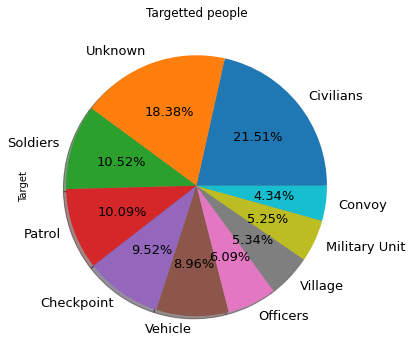

In [36]:
# Visualizing with bar graph

plt.figure(figsize = (15,6))
textprops = {"fontsize":13} # Font size of text in pie chart
df['Target'].value_counts().iloc[:10].plot(kind = 'pie', shadow = True, autopct='%1.2f%%', textprops =textprops)
plt.title("Targetted people")
plt.xticks(rotation = 360)
plt.show()

## Observation
* Looks like The terrorists mosttly prefer to kill inncocent civilians.

### What is the attack target type?

In [37]:
df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,others,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


In [38]:
# Getting the unique values

df['Target_type'].unique()

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Unknown', 'Transportation',
       'Tourists', 'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)

In [39]:
# FInding the value counts

df['Target_type'].value_counts()

Private Citizens & Property       41040
Military                          27443
Police                            23756
Government (General)              20446
Business                          18829
Transportation                     6092
Unknown                            5062
Religious Figures/Institutions     4267
Educational Institution            4139
Utilities                          4136
Government (Diplomatic)            3514
Terrorists/Non-State Militia       2992
Journalists & Media                2885
Violent Political Party            1799
Airports & Aircraft                1318
NGO                                 955
Telecommunication                   906
Tourists                            429
Maritime                            339
Food or Water Supply                297
Abortion Related                    257
Other                               132
Name: Target_type, dtype: int64

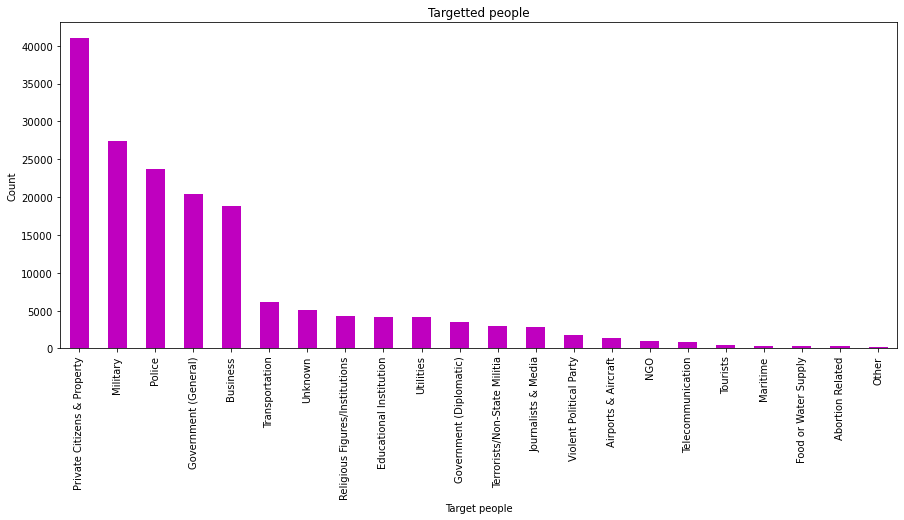

In [40]:
# Visualizing with bar graph

plt.figure(figsize = (15,6))
df['Target_type'].value_counts().plot(kind = 'bar', color = 'm')
plt.title("Targetted people")
#plt.xticks(rotation = 360)
plt.xlabel("Target people")
plt.ylabel("Count")
plt.show()

### Observation
* Private citizen and property is the most affected by terrorism followed by military personnel.

### Which Region is most affected ?

In [41]:
df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,others,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


In [42]:
# Getting the unique values

df['Region'].unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

In [43]:
# Getting teh value counts

df['Region'].value_counts()

Middle East & North Africa     48092
South Asia                     43310
Sub-Saharan Africa             16974
South America                  16575
Western Europe                 15137
Southeast Asia                 12027
Central America & Caribbean     9057
Eastern Europe                  4975
North America                   3344
East Asia                        714
Central Asia                     553
Australasia & Oceania            275
Name: Region, dtype: int64

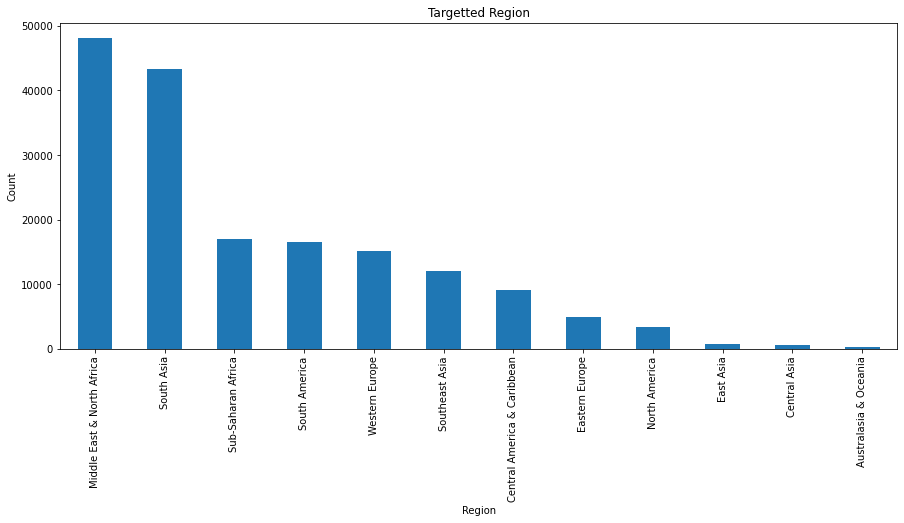

In [44]:
# Visualizing with bar graph

plt.figure(figsize = (15,6))
df['Region'].value_counts().plot(kind = 'bar')
plt.title("Targetted Region")
#plt.xticks(rotation = 360)
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

## Observation
* Most targetted place for terrorist activity is Middle East and North Afria Followed by South asia.

## Bivariate Analysis

### Terrorist activity by region in each year

In [45]:
df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,others,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


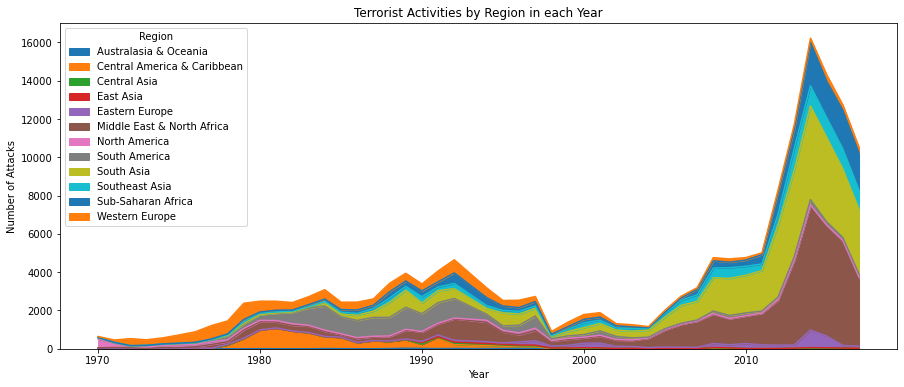

In [46]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

## Insights.
1) Have seen the increasing trend in the attacks over the years from 1970 to 2017.<br/>
2) Iraq has the most attacks.<br/>
3) The Middle East and North Africa Regions has most taregeted.<br/>
4) Maximum number of attacks are from Bombing/Explosions.<br/>
5) There are maximum number of attacks in Private citizens and Property.<br/>
6) Taliban and ISIL has a most active organisation.<br/>